# **Extraer con selenium datos de licitacións do Concello da Coruña** 

**SQL Server**

- docker run -e "ACCEPT_EULA=Y" -e "MSSQL_SA_PASSWORD=Abcd1234." -e "MSSQL_PID=Evaluation" -p 41433:1433  --name sqlpreview --hostname sqlpreview -d mcr.microsoft.com/mssql/server:2022-preview-ubuntu-22.04

In [45]:
#Instalar gecko
from webdriver_manager.firefox import GeckoDriverManager
GeckoDriverManager(version="v0.34.0").install()

#Abrir un navegador
from selenium import webdriver
from selenium.webdriver.common.by import By
driver = webdriver.Firefox()

In [46]:
import argparse
from enum import Enum
import sys
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.action_chains import ActionChains
import time
import random


In [47]:
def waitFinishLoad(driver,idLoader,needsDisapeared=False,by=By.ID,needsWait=False):
    if idLoader is None:
        return
    WebDriverWait(driver, timeout=10).until(EC.presence_of_element_located((by, idLoader)))
    if needsDisapeared:
        WebDriverWait(driver, timeout=10).until(EC.invisibility_of_element((by, idLoader)))
    if needsWait:
        time.sleep(random.choice([0.1,0.2,0.3,0.4,0.5,0.6]))
    else:
        time.sleep(random.choice([0.05,0.1,0.2]))

def elementBy(query,driver,**kargs):
    if not kargs.get("needsWait",False):
        waitFinishLoad(driver,kargs.get("idLoader",None),by=kargs.get("by",By.ID),needsWait=kargs.get("needsWait",False))
    try:
        element=driver.find_element(By.XPATH,query)
    except:
        return None
    waitFinishLoad(driver,kargs.get("idLoader",None),by=kargs.get("by",By.ID),needsWait=kargs.get("needsWait",False))
    return element

def elementByClick(query,driver,**kargs):
    if not kargs.get("needsWait",False):
        waitFinishLoad(driver,kargs.get("idLoader",None),by=kargs.get("by",By.ID),needsWait=kargs.get("needsWait",False))
    element=driver.find_element(By.XPATH,query)
    element.click()
    waitFinishLoad(driver,kargs.get("idLoader",None),by=kargs.get("by",By.ID),needsWait=kargs.get("needsWait",False))
    return element

def elementsBy(query,driver,**kargs):
    if not kargs.get("needsWait",False):
        waitFinishLoad(driver,kargs.get("idLoader",None),by=kargs.get("by",By.ID),needsWait=kargs.get("needsWait",False))
    element=driver.find_elements(By.XPATH,query)
    waitFinishLoad(driver,kargs.get("idLoader",None),by=kargs.get("by",By.ID),needsWait=kargs.get("needsWait",False))
    return element

def clickEvent(driver,element):
    driver.execute_script(element.get_dom_attribute("onClick"))

def goToNextPage(driver):
    element=elementBy("//input[@value='Siguiente']",driver,idLoader="//table[@id='myTablaBusquedaCustom']",by=By.XPATH)
    driver.execute_script("arguments[0].scrollIntoView();", element)
    element.click()


def checkEndPage(driver):
    element=elementBy("//input[@value='Siguiente']",driver,idLoader="//table[@id='myTablaBusquedaCustom']",by=By.XPATH)
    if element:
        return True
    return False

Entramos en la página y nos vamos a publicaciones y luego licitaciones

In [48]:
driver.get("https://contrataciondelestado.es")

In [49]:
elementBy("//a[@title='Buscar publicaciones']",driver,idLoader="footer-newShow").click()

In [50]:
# No es un enlace cualquiera, este esta gestionado por un script que controlaremos por código 
licitacion=elementBy("//div[@class='divLogo']/a",driver,idLoader="footer-newShow")

clickEvent(driver,licitacion)

In [51]:
busqueda_avanzada=elementBy("//div[@class='capaAvanzada']/a",driver,idLoader="contenidoBuscador")

clickEvent(driver,busqueda_avanzada)

In [52]:
seleccionar=elementBy("//div[@class='inlinebloque   ']/a",driver,by=By.XPATH,idLoader="//div[@class='inlinebloque   ']/a")
clickEvent(driver,seleccionar)

In [53]:
def get_corunha(list,driver,i=2):
    """_summary_

    Args:
        list (_type_): _description_
        driver (_type_): _description_
        i (int, optional): _description_. Defaults to 2.
    """
    if i-2<len(list):
        q=f"//*[text()='{list[i-2]}']"
        if len(list)!=i-1:
            q+="/../.."
            query=f"{q}/td[{i}]"
            total = f"{q}/../../../.." if i!=2 else 'footer-newShow'
        else:
            query=q
            q2=f"{q}/../.."
            total = f"{q2}/../../../.."
        if len(list)!=i-1:
            elementByClick(query,driver,by=By.XPATH if i!=2 else By.ID,idLoader=total,notStart=True)
        else:
            return elementsBy(query,driver,by=By.XPATH if i!=2 else By.ID,idLoader=total,notStart=True)
        if i-1!=len(list):
            return get_corunha(list,driver,i+1)

In [54]:
#query="//*[text()='ENTIDADES LOCALES']/../../td[2]"
#elemento=elementByXPATH(query,driver,"footer-newShow")
#elemento.click()
waitFinishLoad(driver,by=By.XPATH,idLoader="//*[text()='ENTIDADES LOCALES']")
get_corunha(['ENTIDADES LOCALES','Galicia','A Coruña','Ayuntamientos','A Coruña'],driver)[1].click()
elementByClick("//span/select/option[1]",driver)
elementByClick("//*[@value='Añadir']",driver)




<selenium.webdriver.remote.webelement.WebElement (session="816b60dd-af9a-4251-b1c6-821b9f0e3365", element="e7abe171-5a5c-4143-833a-97b58bd943ec")>

In [55]:
elementByClick("//*[@title='Buscar']",driver)

<selenium.webdriver.remote.webelement.WebElement (session="816b60dd-af9a-4251-b1c6-821b9f0e3365", element="614253f0-8a88-40ec-a445-6165b6dc96d7")>

In [ ]:
from io import StringIO
from bs4 import BeautifulSoup
import pandas as pd


dfT = pd.DataFrame([])
while(True):
    waitFinishLoad(driver,by=By.XPATH,idLoader="//div/span[text()='Importe']")
    
    soup=BeautifulSoup(driver.page_source,'html.parser')
    df=pd.read_html(StringIO(str(soup.find(id="myTablaBusquedaCustom"))))[0]
    df=df[~df.iloc[:,0].str.startswith('Página')]
    dfT=pd.concat([dfT,df])
    print(dfT.size)
    if not checkEndPage(driver):
        break
    goToNextPage(driver)

In [57]:
for i in dfT.columns:
    dfT[i] = dfT[i].str.replace(r"(\w)([A-Z])", r"\1\\n\2", regex=True)
dfT

,Expediente,Tipo de Contrato,Estado,Importe,Fechas,Órgano de Contratación
0,236/2023/57\nProcedimiento abierto simplificad...,Servicios\nServicios de transporte por vía ter...,Resuelta,"58.050,00",Publicación P\nLA\nCS\nP:Adjudicación:11/01/20...,Junta de Gobierno del Ayuntamiento de A Coruña
1,851/2023/103\nContratación mixta de suministro...,Suministros\nAdquisición,Adjudicada,"231.404,96",Publicación P\nLA\nCS\nP:Adjudicación:29/01/2024,Junta de Gobierno del Ayuntamiento de A Coruña
2,370/2024/26\nConcierto de una operación de pré...,Privado,Publicada,"22.763.291,51",Present. Solicitud:14/02/2024\nPresent. Oferta...,Junta de Gobierno del Ayuntamiento de A Coruña
3,237/2023/208\nProcedimiento abierto simplifica...,Servicios\nOtros servicios,Adjudicada,"59.534,03",Publicación P\nLA\nCS\nP:Adjudicación:31/01/2024,Junta de Gobierno del Ayuntamiento de A Coruña
4,231/2022/231\nAcuerdo Marco de suministro de f...,Suministros\nAdquisición,Resuelta,"93.420,22",Publicación P\nLA\nCS\nP:Adjudicación:29/12/20...,Junta de Gobierno del Ayuntamiento de A Coruña
...,...,...,...,...,...,...
2,"370/2018/60\nContrato de préstamo, con previa ...",Privado,Adjudicada,"7.975.450,00",Publicación P\nLA\nCS\nP:Adjudicación:15/06/2018,Junta de Gobierno del Ayuntamiento de A Coruña
3,106/2018/117\nSuministro de Gas Natural para c...,Suministros\nAdquisición,Evaluación,"28.099,17",Present. Oferta:28/06/2018,Junta de Gobierno del Ayuntamiento de A Coruña
4,236/2018/41\nObra de sustitución de la cubiert...,Obras\nConstrucción,Resuelta,"58.162,82",Publicación P\nLA\nCS\nP:Adjudicación:31/05/20...,Junta de Gobierno del Ayuntamiento de A Coruña
5,541/2018/916\nRefuerzo de contenedores en la z...,Servicios\nServicios de alcantarillado y elimi...,Evaluación,"16.043,52",Present. Oferta:24/05/2018,Junta de Gobierno del Ayuntamiento de A Coruña


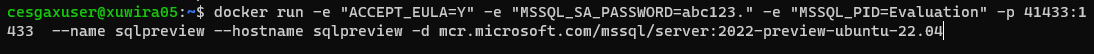

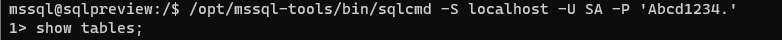

In [58]:
#!conda install -c conda-forge -y pyodbc

curl https://packages.microsoft.com/keys/microsoft.asc | sudo tee /etc/apt/trusted.gpg.d/microsoft.asc

#Download appropriate package for the OS version
#Choose only ONE of the following, corresponding to your OS version

#Debian 9
curl https://packages.microsoft.com/config/debian/9/prod.list | sudo tee /etc/apt/sources.list.d/mssql-release.list

#Debian 10
curl https://packages.microsoft.com/config/debian/10/prod.list | sudo tee /etc/apt/sources.list.d/mssql-release.list

#Debian 11
curl https://packages.microsoft.com/config/debian/11/prod.list | sudo tee /etc/apt/sources.list.d/mssql-release.list

#Debian 12
curl https://packages.microsoft.com/config/debian/12/prod.list | sudo tee /etc/apt/sources.list.d/mssql-release.list

sudo apt-get update
sudo ACCEPT_EULA=Y apt-get install -y msodbcsql18
# optional: for bcp and sqlcmd
sudo ACCEPT_EULA=Y apt-get install -y mssql-tools18
echo 'export PATH="$PATH:/opt/mssql-tools18/bin"' >> ~/.bashrc
source ~/.bashrc
# optional: for unixODBC development headers
sudo apt-get install -y unixodbc-dev
# optional: kerberos library for debian-slim distributions
sudo apt-get install -y libgssapi-krb5-2

# Windows

<a href="https://learn.microsoft.com/en-us/sql/connect/odbc/windows/system-requirements-installation-and-driver-files?view=sql-server-ver16#installing-microsoft-odbc-driver-for-sql-server">ODBC</a>

CREATE TABLE Concellos.dbo.ConcelloDatos (
	Expediente varchar(300) NULL,
	[Tipo de Contrato] varchar(200) NULL,
	Estado varchar(50) NULL,
	Importe decimal(38,0) NULL,
	Fechas varchar(100) NULL,
	[Órgano de Contratación] varchar(100) NULL
);


In [8]:
import pyodbc

connectionString = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER=10.133.29.104,41433;DATABASE=Concellos;UID=sa;PWD=Abcd1234.;Encrypt=no'
conexion = pyodbc.connect(connectionString)

In [9]:
cursor = conexion.cursor()
cursor.execute("""
               Select *
               From ConcelloDatos
""")
tuplas = cursor.fetchall()
for tupla in tuplas:
    tupla.Expediente

In [4]:
cursor.close()
conexion.close()